## Stock Sentiment Analysis using News Headlines

In [1]:
import numpy as np
import pandas as pd
import opendatasets as od
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import itertools
import matplotlib.pyplot as plt

In [2]:
od.download("https://www.kaggle.com/siddharthtyagi/news-headlines-dataset-for-stock-sentiment-analyze")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hridayashinde
Your Kaggle Key: ········


  0%|          | 0.00/3.15M [00:00<?, ?B/s]

100%|██████████| 3.15M/3.15M [00:00<00:00, 12.4MB/s]

In [3]:
df=pd.read_csv('news-headlines-dataset-for-stock-sentiment-analyze/Data.csv')

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


#### Label = 1 means stock price will increase with respect to particular headlines,
#### Label = 0 means it will either be constant or decrease

In [5]:
train_set = df[df['Date']<'20150101']
test_set = df[df['Date']>'20141231']
train_set.shape

(3975, 27)

### Creating TF-IDF vectorizer

In [6]:
tfvector=TfidfVectorizer(ngram_range = (2,3))

### Cleaning and preprocessing data

In [7]:
def x_clean(df0):
    data = df0.iloc[:,2:27]
    data.replace("[^a-zA-Z]", " ",regex = True, inplace = True)
    for col in data.columns:
        data[col]=data[col].str.lower()
    headlines = []
    for row in range(0,len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
    return headlines

In [8]:
train_set_x_clean = x_clean(train_set)

#implement TF-IDF for train data
train_set_x_clean = tfvector.fit_transform(train_set_x_clean)

In [9]:
test_set_x_clean = x_clean(test_set)

#implement TF-IDF for test data
test_set_x_clean = tfvector.transform(test_set_x_clean)

### Random Forest Classifier

In [10]:
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
randomclassifier.fit(train_set_x_clean,train_set['Label'])

RandomForestClassifier(criterion='entropy')

In [11]:
predictions = randomclassifier.predict(test_set_x_clean)

### plot_confusion_matrix

In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["Down", "Up"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


[[150  36]
 [ 18 174]]


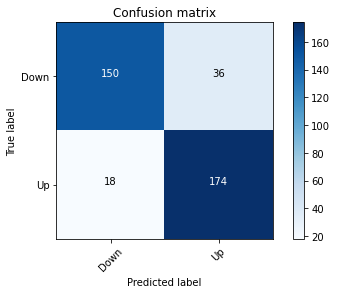

In [13]:
plt.figure()
cm=confusion_matrix(test_set['Label'],predictions)
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [14]:
score=accuracy_score(test_set['Label'],predictions)
print(score)
report=classification_report(test_set['Label'],predictions)
print(report)

0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       186
           1       0.83      0.91      0.87       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



### MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_set_x_clean,train_set['Label'])

predictions = nb.predict(test_set_x_clean)
matrix=confusion_matrix(test_set['Label'],predictions)
print(matrix)
score=accuracy_score(test_set['Label'],predictions)
print(score)
report=classification_report(test_set['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



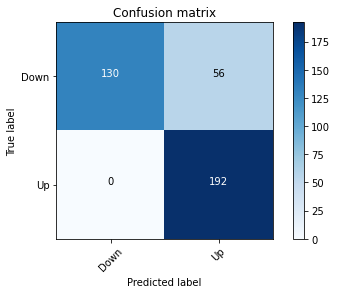

In [16]:
plot_confusion_matrix(matrix)